# Machine Learning Engineer Nanodegree
## Model Evaluation & Validation
## Project 1: Predicting Boston Housing Prices

Welcome to the first project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been written. You will need to implement additional functionality to successfully answer all of the questions for this project. Unless it is requested, do not modify any of the code that has already been included. In this template code, there are four sections which you must complete to successfully produce a prediction with your model. Each section where you will write code is preceded by a **STEP X** header with comments describing what must be done. Please read the instructions carefully!

In addition to implementing code, there will be questions that you must answer that relate to the project and your implementation. Each section where you will answer a question is preceded by a **QUESTION X** header. Be sure that you have carefully read each question and provide thorough answers in the text boxes that begin with "**Answer:**". Your project submission will be evaluated based on your answers to each of the questions.  

A description of the dataset can be found [here](https://archive.ics.uci.edu/ml/datasets/Housing), which is provided by the **UCI Machine Learning Repository**.

# Getting Started
To familiarize yourself with an iPython Notebook, **try double clicking on this cell**. You will notice that the text changes so that all the formatting is removed. This allows you to make edits to the block of text you see here. This block of text (and mostly anything that's not code) is written using [Markdown](http://daringfireball.net/projects/markdown/syntax), which is a way to format text using headers, links, italics, and many other options! Whether you're editing a Markdown text block or a code block (like the one below), you can use the keyboard shortcut **Shift + Enter** or **Shift + Return** to execute the code or text block. In this case, it will show the formatted text.

Let's start by setting up some code we will need to get the rest of the project up and running. Use the keyboard shortcut mentioned above on the following code block to execute it. Alternatively, depending on your iPython Notebook program, you can press the **Play** button in the hotbar. You'll know the code block executes successfully if the message *"Boston Housing dataset loaded successfully!"* is printed.

In [2]:
# Importing a few necessary libraries
import numpy as np
import matplotlib.pyplot as pl
from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor

# Make matplotlib show our plots inline (nicely formatted in the notebook)
%matplotlib inline

# Create our client's feature set for which we will be predicting a selling price
CLIENT_FEATURES = [[11.95, 0.00, 18.100, 0, 0.6590, 5.6090, 90.00, 1.385, 24, 680.0, 20.20, 332.09, 12.13]]

# Load the Boston Housing dataset into the city_data variable
city_data = datasets.load_boston()

# Initialize the housing prices and housing features
housing_prices = city_data.target
housing_features = city_data.data

print "Boston Housing dataset loaded successfully!"

Boston Housing dataset loaded successfully!


# Statistical Analysis and Data Exploration
In this first section of the project, you will quickly investigate a few basic statistics about the dataset you are working with. In addition, you'll look at the client's feature set in `CLIENT_FEATURES` and see how this particular sample relates to the features of the dataset. Familiarizing yourself with the data through an explorative process is a fundamental practice to help you better understand your results.

## Step 1
In the code block below, use the imported `numpy` library to calculate the requested statistics. You will need to replace each `None` you find with the appropriate `numpy` coding for the proper statistic to be printed. Be sure to execute the code block each time to test if your implementation is working successfully. The print statements will show the statistics you calculate!

In [3]:
# Number of houses in the dataset
total_houses = housing_features.shape[0]

# Number of features in the dataset
total_features = housing_features.shape[1]

# Minimum housing value in the dataset
minimum_price = min(housing_prices)

# Maximum housing value in the dataset
maximum_price = max(housing_prices)

# Mean house value of the dataset
mean_price = housing_prices.mean()

# Median house value of the dataset
median_price = np.median(housing_prices)

# Standard deviation of housing values of the dataset
std_dev = np.std(housing_prices)

# Show the calculated statistics
print "Boston Housing dataset statistics (in $1000's):\n"
print "Total number of houses:", total_houses
print "Total number of features:", total_features
print "Minimum house price:", minimum_price
print "Maximum house price:", maximum_price
#the 0.3f was causing a fatal error, I'm not sure why. replacing it with just 0 works though.
print "Mean house price: {0}".format(mean_price)
print "Median house price:", median_price
print "Standard deviation of house price: {0}".format(std_dev)

Boston Housing dataset statistics (in $1000's):

Total number of houses: 506
Total number of features: 13
Minimum house price: 5.0
Maximum house price: 50.0
Mean house price: 22.5328063241
Median house price: 21.2
Standard deviation of house price: 9.18801154528


## Question 1
As a reminder, you can view a description of the Boston Housing dataset [here](https://archive.ics.uci.edu/ml/datasets/Housing), where you can find the different features under **Attribute Information**. The `MEDV` attribute relates to the values stored in our `housing_prices` variable, so we do not consider that a feature of the data.

*Of the features available for each data point, choose three that you feel are significant and give a brief description for each of what they measure.*

Remember, you can **double click the text box below** to add your answer!

**Answer: **

The following three features seem most promising as areas to predict sale price:

CRIM, or per capita crime rate, is the frequency of crime in the area the house belongs to. This is typically a predictor of property values and economic status in general, so it seems like a potentially very important feature.

INDUS describes the proportion of non-retail business acres in town. Since this is related to the character of the house's location, and will have strong effects on how a population center fares economically in relation to business cycles, it seems like a potentially important feature to study.

RM is the average number of rooms per dwelling, and being related to square footage it seems likely to be an important feature for predicting sale prices.

## Question 2
*Using your client's feature set `CLIENT_FEATURES`, which values correspond with the features you've chosen above?*  
**Hint: ** Run the code block below to see the client's data.

In [4]:
print CLIENT_FEATURES

[[11.95, 0.0, 18.1, 0, 0.659, 5.609, 90.0, 1.385, 24, 680.0, 20.2, 332.09, 12.13]]


**Answer: **
The features I mentioned as potentially the most important have the following values:

CRIM: 11.95 (presumably convictions per 1000)
INDUS: 18.1 (presumably percent)
RM: 5.609 (This is simply a dimensionless count)


# Evaluating Model Performance
In this second section of the project, you will begin to develop the tools necessary for a model to make a prediction. Being able to accurately evaluate each model's performance through the use of these tools helps to greatly reinforce the confidence in your predictions.

## Step 2
In the code block below, you will need to implement code so that the `shuffle_split_data` function does the following:
- Randomly shuffle the input data `X` and target labels (housing values) `y`.
- Split the data into training and testing subsets, holding 30% of the data for testing.

If you use any functions not already acessible from the imported libraries above, remember to include your import statement below as well!   
Ensure that you have executed the code block once you are done. You'll know the `shuffle_split_data` function is working if the statement *"Successfully shuffled and split the data!"* is printed.

In [5]:
from sklearn.cross_validation import train_test_split

def shuffle_split_data(X, y):
    """ Shuffles and splits data into 70% training and 30% testing subsets,
        then returns the training and testing subsets. """

    # Shuffle and split the data
    X_train = None
    y_train = None
    X_test = None
    y_test = None
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=300, random_state=42)
    #Reference 1: sklearn documentation

    # Return the training and testing data subsets
    return X_train, y_train, X_test, y_test

print(shuffle_split_data(housing_features, housing_prices))
# Test shuffle_split_data
try:
    X_train, y_train, X_test, y_test = shuffle_split_data(housing_features, housing_prices)
    print "Successfully shuffled and split the data!"
except:
    print "Something went wrong with shuffling and splitting the data."

(array([[  2.49800000e-02,   0.00000000e+00,   1.89000000e+00, ...,
          1.59000000e+01,   3.89960000e+02,   8.65000000e+00],
       [  5.08300000e-02,   0.00000000e+00,   5.19000000e+00, ...,
          2.02000000e+01,   3.89710000e+02,   5.68000000e+00],
       [  4.83567000e+00,   0.00000000e+00,   1.81000000e+01, ...,
          2.02000000e+01,   3.88220000e+02,   1.14500000e+01],
       ..., 
       [  1.50100000e-02,   8.00000000e+01,   2.01000000e+00, ...,
          1.70000000e+01,   3.90940000e+02,   5.99000000e+00],
       [  1.11604000e+01,   0.00000000e+00,   1.81000000e+01, ...,
          2.02000000e+01,   1.09850000e+02,   2.32700000e+01],
       [  2.28760000e-01,   0.00000000e+00,   8.56000000e+00, ...,
          2.09000000e+01,   7.08000000e+01,   1.06300000e+01]]), array([ 16.5,  22.2,  20.6,  13.5,  48.3,  23.8,  22.7,  17.4,  30.3,
        36. ,  41.7,  18.3,  22. ,  18.6,  44.8,  11.9,  18.7,  16.2,
        22. ,   7.2,  20.4,  13.8,  13. ,  18.4,  23.1,  21.2,  

## Question 3
*Why do we split the data into training and testing subsets for our model?*

**Answer: **
We split data into test and training sets because it would otherwise be impossible to tell to what degree our model works only for the data it learned on and to what degree it makes useful predictions about novel data of the same nature. To put it another way, if we tested our model using our training data, we wouldn't know to what degree we are overfitting.


## Step 3
In the code block below, you will need to implement code so that the `performance_metric` function does the following:
- Perform a total error calculation between the true values of the `y` labels `y_true` and the predicted values of the `y` labels `y_predict`.

You will need to first choose an appropriate performance metric for this problem. See [the sklearn metrics documentation](http://scikit-learn.org/stable/modules/classes.html#sklearn-metrics-metrics) to view a list of available metric functions. **Hint: ** Look at the question below to see a list of the metrics that were covered in the supporting course for this project.

Once you have determined which metric you will use, remember to include the necessary import statement as well!  
Ensure that you have executed the code block once you are done. You'll know the `performance_metric` function is working if the statement *"Successfully performed a metric calculation!"* is printed.

In [6]:
from sklearn.metrics import mean_squared_error
from sklearn.grid_search import GridSearchCV
from sklearn.svm import LinearSVC

def performance_metric(y_true, y_predict):
    """ Calculates and returns the total error between true and predicted values
        based on a performance metric chosen by the student. """

    error = mean_squared_error(y_true, y_predict)
    return error


# Test performance_metric
try:
    total_error = performance_metric(y_train, y_train)
    print "Successfully performed a metric calculation!"
except:
    print "Something went wrong with performing a metric calculation."

Successfully performed a metric calculation!


## Question 4
*Which performance metric below did you find was most appropriate for predicting housing prices and analyzing the total error. Why?*
- *Accuracy*
- *Precision*
- *Recall*
- *F1 Score*
- *Mean Squared Error (MSE)*
- *Mean Absolute Error (MAE)*

**Answer: **

Accuracy, precision, recall and F1 score were all presented as being used only in discreet prediction, and even if scikit has functions that allow them to be used for continuous variables, it seems like a bad idea to shoehorn them into a continuous prediction problem. Eliminating these four left only Mean Squared Error and Mean Absolute Error. I chose Mean Squared Error (MSE) because this metric is a standard measure of central tendancy and lets me think more intuitively about how 'good' my predictions are, since I can visualize the cutoffs in a normal distribution. It also makes sense that it is more important to get most estimates 'pretty good' and have few large errors than to have most estimates 'very good' but have more large errors. using MSE will increase the 'cost' of larger errors and lead to a larger band at higher confidence than if I had used absolute error. 

With a variable like housing sale price, it is likely that there would be a lot of unknown variables that affect the price, so it might be impossible to make a predictive model that gets a large majority of guesses close to correct - however, even if that is the case, we would still want to minimize the number of 'way off' guesses as much as possible. 

## Step 4 (Final Step)
In the code block below, you will need to implement code so that the `fit_model` function does the following:
- Create a scoring function using the same performance metric as in **Step 2**. See the [sklearn `make_scorer` documentation](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html).
- Build a GridSearchCV object using `regressor`, `parameters`, and `scoring_function`. See the [sklearn documentation on GridSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.grid_search.GridSearchCV.html).

When building the scoring function and GridSearchCV object, *be sure that you read the parameters documentation thoroughly.* It is not always the case that a default parameter for a function is the appropriate setting for the problem you are working on.

Since you are using `sklearn` functions, remember to include the necessary import statements below as well!  
Ensure that you have executed the code block once you are done. You'll know the `fit_model` function is working if the statement *"Successfully fit a model to the data!"* is printed.

In [8]:
from sklearn.metrics import make_scorer

from sklearn.grid_search import GridSearchCV




def fit_model(X, y):
    """ Tunes a decision tree regressor model using GridSearchCV on the input data X 
        and target labels y and returns this optimal model. """
    


    # Create a decision tree regressor object
    regressor = DecisionTreeRegressor()

    # Set up the parameters we wish to tune
    parameters = {'max_depth':(1,2,3,4,5,6,7,8,9,10)}

    # Make an appropriate scoring function
    scoring_function = make_scorer(mean_squared_error, greater_is_better=False) 
    print(scoring_function)

    # Make the GridSearchCV object
    reg = GridSearchCV(regressor, param_grid = parameters, scoring = scoring_function)
    print(reg)
    
    # Fit the learner to the data to obtain the optimal model with tuned parameters
    reg.fit(X,y)

    # Return the optimal model
    return reg.best_estimator_


# Test fit_model on entire dataset
try:
    reg = fit_model(housing_features, housing_prices)
    print "Successfully fit a model!"
except:
    print "Something went wrong with fitting a model."

make_scorer(mean_squared_error, greater_is_better=False)
GridSearchCV(cv=None, error_score='raise',
       estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'max_depth': (1, 2, 3, 4, 5, 6, 7, 8, 9, 10)},
       pre_dispatch='2*n_jobs', refit=True,
       scoring=make_scorer(mean_squared_error, greater_is_better=False),
       verbose=0)
Successfully fit a model!


## Question 5
*What is the grid search algorithm and when is it applicable?*

**Answer: **

The grid search algorithm iteratively tunes a model by searching through all the parameters passed by the programmer to find which parameters are best for producing an accurate model. when multiple sets of parameters are passed, each combination is evaluated one after the other (in our case, the passed parameters were various depths of our decision tree regression).

In addition to choosing the parameters to evaluate, the programmer must also choose how GridSearchCV evaluates them - in our case this was done by passing the command to minimize mean squared error.

GridSearchCV is an exhaustive search, so for very large data sets (protein folding or Go analysis for example) it wouldn't be appropriate. For smaller data sets like this one though, it produces clear-cut results.


## Question 6
*What is cross-validation, and how is it performed on a model? Why would cross-validation be helpful when using grid search?*

**Answer: **

Cross-validation is when one divides one's data into n parts, 'trains' one's model using n-1 of these parts, and 'tests' it against the remaining part. This process is then repeated for each of the n subdivisions, and the results averaged. In this way, we can essentially 'train' and 'test' a model on an entire data set rather than using only part of it for training and part for testing. By randomizing and using the entire data set, we avoid artifacts like the order data was entered in or a biased random assignment.

For grid search this is particularly important since overfitting can easily happen, particularly when a complex grid search algorithm produces much better results by simply memorizing the training set. This is more likely to occur the smaller the testing or training set, hence cross-validation can help by increasing the absolute 'size' of both. 

Using grid search to find the best parameters for only a subset of the data poses two obvious problems: a parameter could be very consistant but have a subtle effect, and in this case we would be more likely to detect it if we are searching over the entire data set. At the same time, the complexity of grid search algorithms make overfitting very easy, especially in a relatively small data set. But it is much less likely to happen if we employ cross-validation, since we are essentially also testing the parameters against the entire data set, thus reducing the likelihood that the parameters we do find do not help predict novel data. 

# Checkpoint!
You have now successfully completed your last code implementation section. Pat yourself on the back! All of your functions written above will be executed in the remaining sections below, and questions will be asked about various results for you to analyze. To prepare the **Analysis** and **Prediction** sections, you will need to intialize the two functions below. Remember, there's no need to implement any more code, so sit back and execute the code blocks! Some code comments are provided if you find yourself interested in the functionality.

In [8]:
def learning_curves(X_train, y_train, X_test, y_test):
    """ Calculates the performance of several models with varying sizes of training data.
        The learning and testing error rates for each model are then plotted. """
    
    print "Creating learning curve graphs for max_depths of 1, 3, 6, and 10. . ."
    
    # Create the figure window
    fig = pl.figure(figsize=(10,8))

    # We will vary the training set size so that we have 50 different sizes
    sizes = np.rint(np.linspace(1, len(X_train), 50)).astype(int)
    train_err = np.zeros(len(sizes))
    test_err = np.zeros(len(sizes))

    # Create four different models based on max_depth
    for k, depth in enumerate([1,3,6,10]):
        
        for i, s in enumerate(sizes):
            
            # Setup a decision tree regressor so that it learns a tree with max_depth = depth
            regressor = DecisionTreeRegressor(max_depth = depth)
            
            # Fit the learner to the training data
            regressor.fit(X_train[:s], y_train[:s])

            # Find the performance on the training set
            train_err[i] = performance_metric(y_train[:s], regressor.predict(X_train[:s]))
            
            # Find the performance on the testing set
            test_err[i] = performance_metric(y_test, regressor.predict(X_test))

        # Subplot the learning curve graph
        ax = fig.add_subplot(2, 2, k+1)
        ax.plot(sizes, test_err, lw = 2, label = 'Testing Error')
        ax.plot(sizes, train_err, lw = 2, label = 'Training Error')
        ax.legend()
        ax.set_title('max_depth = %s'%(depth))
        ax.set_xlabel('Number of Data Points in Training Set')
        ax.set_ylabel('Total Error')
        ax.set_xlim([0, len(X_train)])
    
    # Visual aesthetics
    fig.suptitle('Decision Tree Regressor Learning Performances', fontsize=18, y=1.03)
    fig.tight_layout()
    fig.show()

In [9]:
def model_complexity(X_train, y_train, X_test, y_test):
    """ Calculates the performance of the model as model complexity increases.
        The learning and testing errors rates are then plotted. """
    
    print "Creating a model complexity graph. . . "

    # We will vary the max_depth of a decision tree model from 1 to 14
    max_depth = np.arange(1, 14)
    train_err = np.zeros(len(max_depth))
    test_err = np.zeros(len(max_depth))

    for i, d in enumerate(max_depth):
        # Setup a Decision Tree Regressor so that it learns a tree with depth d
        regressor = DecisionTreeRegressor(max_depth = d)

        # Fit the learner to the training data
        regressor.fit(X_train, y_train)

        # Find the performance on the training set
        train_err[i] = performance_metric(y_train, regressor.predict(X_train))

        # Find the performance on the testing set
        test_err[i] = performance_metric(y_test, regressor.predict(X_test))

    # Plot the model complexity graph
    pl.figure(figsize=(7, 5))
    pl.title('Decision Tree Regressor Complexity Performance')
    pl.plot(max_depth, test_err, lw=2, label = 'Testing Error')
    pl.plot(max_depth, train_err, lw=2, label = 'Training Error')
    pl.legend()
    pl.xlabel('Maximum Depth')
    pl.ylabel('Total Error')
    pl.show()

# Analyzing Model Performance
In this third section of the project, you'll take a look at several models' learning and testing error rates on various subsets of training data. Additionally, you'll investigate one particular algorithm with an increasing `max_depth` parameter on the full training set to observe how model complexity affects learning and testing errors. Graphing your model's performance based on varying criteria can be beneficial in the analysis process, such as visualizing behavior that may not have been apparent from the results alone.

Creating learning curve graphs for max_depths of 1, 3, 6, and 10. . .


C:\Users\User1\Anaconda2\lib\site-packages\matplotlib\figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


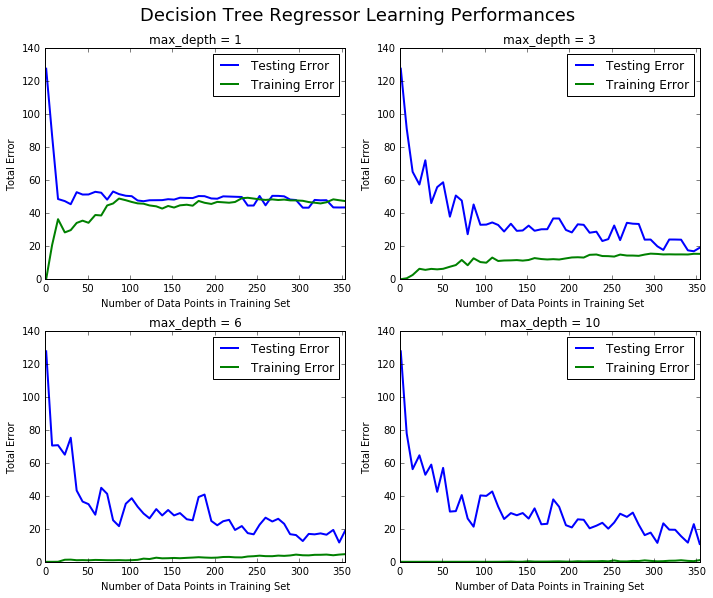

In [10]:
learning_curves(X_train, y_train, X_test, y_test)

## Question 7
*Choose one of the learning curve graphs that are created above. What is the max depth for the chosen model? As the size of the training set increases, what happens to the training error? What happens to the testing error?*

**Answer: **

I chose the third learning curve graph, the one with a max depth of 6. In this figure, testing error rapidly decreases for the first 50-60 data points. A slower and clearly decelerating decline is visible as the number of data points increases, with only very little downward trend observable after the first 80-90 measurements. It appears to be best modeled by an exponential decay function of the form (A-b*e^(-x)), beginning at ~130 when data points=0, and ~15 when data points = 350

Training error appears to increase linearly, with the maximum number of data points leading to a testing error of about half that of the training error. Presumably it also roughly follows an exponential decay curve (though increasing, of the form A+b*e^(-x)), but it is not visible on this size data set.


## Question 8
*Look at the learning curve graphs for the model with a max depth of 1 and a max depth of 10. When the model is using the full training set, does it suffer from high bias or high variance when the max depth is 1? What about when the max depth is 10?*

**Answer: **
At max depth 1, the training and testing errors start out very far apart, with the training error at zero. We can thus assume that the model's error begins being 100% variance. As the number of data points increase, the training error also increases while the testing error decreases, with the two converging at the same value around 75 data points. We can assume therefore that a model with a max depth of 1 is 'as good as it gets' around 75 data points, and that most error after that is due to bias. 

At maximum depth of 10, the training error remains very close to zero, indicating negligible bias. The model still shows variability at max depth 10 however, as testing error appears to 'level off' at about half the error the first model converged at when Data Points = 100. This indicates that there is still a fair amount of variance in the model.

Creating a model complexity graph. . . 


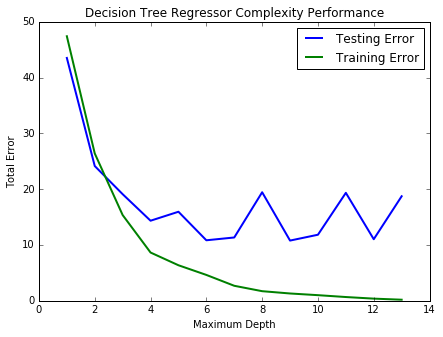

In [11]:
model_complexity(X_train, y_train, X_test, y_test)

## Question 9
*From the model complexity graph above, describe the training and testing errors as the max depth increases. Based on your interpretation of the graph, which max depth results in a model that best generalizes the dataset? Why?*

**Answer: **

In this figure we can see training error rapidly decreases over the first 6 measurements. After the first six measurements testing error seems to stabilize or 'level off' at an average error of ~15. Training error rapidly decreases over the first six measurements as well and approaches 0 by nine measurements. After nine measurements, training error remains at ~0. (where a measurement is represented by a tick on the x-axis, and error is measured on the y-axis)

After running the function a few times, I would say a max depth of 6 best generalizes the data because it leads to roughly the lowest testing error, the value of interest. The rate of decline in testing error as a function of maximum depth clearly slows around max depth = 4, but for a value of 6 at least the testing error value is still noticeably lower, though most commonly only marginally better than 5. While max depths higher than 6 have testing error values very close to and sometimes less than the error we see at max depth 6, the absolute numbers are close enough that they do not seem to justify the extra computing power they would require for essentially the same performance.

# Model Prediction
In this final section of the project, you will make a prediction on the client's feature set using an optimized model from `fit_model`. When applying grid search along with cross-validation to optimize your model, it would typically be performed and validated on a training set and subsequently evaluated on a **dedicated test set**. In this project, the optimization below is performed on the *entire dataset* (as opposed to the training set you made above) due to the many outliers in the data. Using the entire dataset for training provides for a less volatile prediction at the expense of not testing your model's performance. 

*To answer the following questions, it is recommended that you run the code blocks several times and use the median or mean value of the results.*

## Question 10
*Using grid search on the entire dataset, what is the optimal `max_depth` parameter for your model? How does this result compare to your intial intuition?*  
**Hint: ** Run the code block below to see the max depth produced by your optimized model.

In [12]:
print "Final model has an optimal max_depth parameter of", reg.get_params()['max_depth']

Final model has an optimal max_depth parameter of 5


#### **Answer: **

The optimized model has a max_depth parameter of 5. This is in line with my 'eballing it' guess of 6. 

## Question 11
*With your parameter-tuned model, what is the best selling price for your client's home? How does this selling price compare to the basic statistics you calculated on the dataset?*  

**Hint: ** Run the code block below to have your parameter-tuned model make a prediction on the client's home.

In [13]:
sale_price = reg.predict(CLIENT_FEATURES)
print "Predicted value of client's home: {0:.3f}".format(sale_price[0])

Predicted value of client's home: 20.968


**Answer: **

The predicted value of the client's home is 20.968, slightly below the mean and median price of homes already sold, but very close to both values, being less than half a standard deviation away from the mean.

## Question 12 (Final Question):
*In a few sentences, discuss whether you would use this model or not to predict the selling price of future clients' homes in the Greater Boston area.*

**Answer: **
I might use this model to predict the likely house price, but I would use that as a rough guideline only. The downside to using a model like this would be that I would want to initially offer a home for more than the likely sale price. A model like this would make it easier to know what the likely sale price is, but when one is deliberately offering a very high price, it is not difficult to do so even without a sophisticated knowledge of the market, especially the historical market. The most obvious use of this model would be to manage my clients' expectations, but showing a simple model like this one which does not include whether a realtor was involved might make them think that I, as a realtor, am not all that important to the transaction. 

I might use a model like this one as the basis for a more sophisticated model, which takes into account not just the sale price of similar houses but how long a home stays on the market as its price deviates from the mean. A model like that I could actually use to optimize my comission and likelihood of a happy customer.